##<b> The International Cricket Council (ICC) is the world governing body of cricket. It was founded as the Imperial Cricket Conference in 1909 by representatives from Australia, England and South Africa. It was renamed as the International Cricket Conference in 1965, and took up its current name in 1989. It organises world championship events such as Cricket World Cup, Women's Cricket World Cup, ICC T20 World Cup, ICC Women's T20 World Cup, ICC Champions Trophy and Under-19 Cricket World Cup.</b>

<br>

## <b> You recently got a lucky break in the field of Data Science. You got a job of Data Scientist at ICC. You are part of the Analytics Team which is involved in pre-match analyses, live-match analyses and post-match analyses. </b>

<br>

## <b>This data consists of 1417 T20 matches. Each row corresponds to a single T20 match. As a data scientist, you have to first explore the data and check its sanity. </b>

<br>

## <u><b>Further you are required to do some analyses :</b></u>
* ### Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date
* ### Find out the top three venues which hosted the greatest number of matches.
* ### Find out the pair of cricket teams who played the most number of T20 matches against each other.
* ### Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.
* ### Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.




# <b><center> A sample scorecard </center></b>

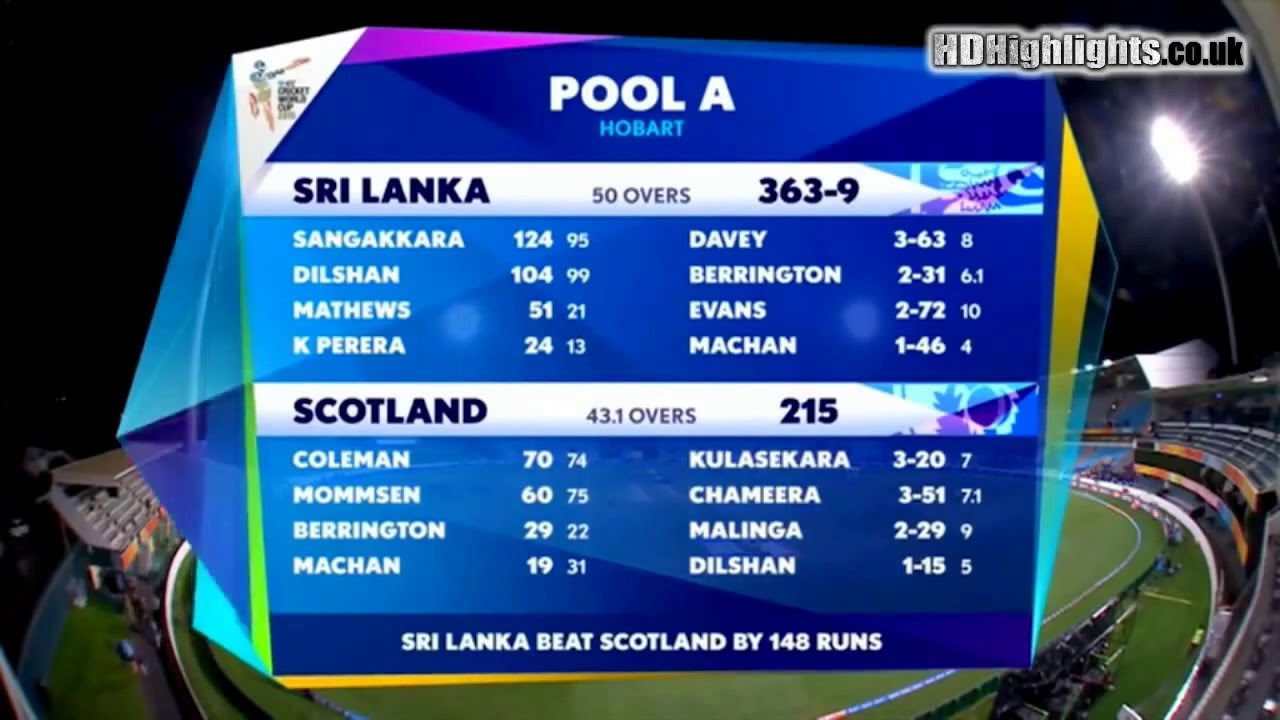

In [ ]:
#Import package
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns
sns.set(rc={'figure.figsize':(30,21)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_directory = '/content/drive/My Drive/AlmaBetter/Module 1/Week 4/Day 6/dat/'
df = pd.read_csv(working_directory + 'International_T20_Data.csv',parse_dates=['meta.created'])

In [ ]:
df.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   innings                      1417 non-null   object        
 1   meta.data_version            1417 non-null   float64       
 2   meta.created                 1417 non-null   datetime64[ns]
 3   meta.revision                1417 non-null   int64         
 4   info.dates                   1417 non-null   object        
 5   info.gender                  1417 non-null   object        
 6   info.match_type              1417 non-null   object        
 7   info.outcome.by.wickets      651 non-null    float64       
 8   info.outcome.winner          1372 non-null   object        
 9   info.overs                   1417 non-null   int64         
 10  info.player_of_match         1255 non-null   object        
 11  info.teams                   1417 non-null 

# **Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date**

In [ ]:
df.columns = [x.replace('.','_').replace('info_','').replace('meta_','') for x in list(df.columns)]

In [ ]:
df.columns

Index(['innings', 'data_version', 'created', 'revision', 'dates', 'gender',
       'match_type', 'outcome_by_wickets', 'outcome_winner', 'overs',
       'player_of_match', 'teams', 'toss_decision', 'toss_winner', 'umpires',
       'venue', 'city', 'outcome_by_runs', 'match_type_number',
       'neutral_venue', 'outcome_method', 'outcome_result',
       'outcome_eliminator', 'supersubs_New Zealand', 'supersubs_South Africa',
       'bowl_out', 'outcome_bowl_out'],
      dtype='object')

In [ ]:
df.head(1)

,innings,data_version,created,revision,dates,gender,match_type,outcome_by_wickets,outcome_winner,overs,player_of_match,teams,toss_decision,toss_winner,umpires,venue,city,outcome_by_runs,match_type_number,neutral_venue,outcome_method,outcome_result,outcome_eliminator,supersubs_New Zealand,supersubs_South Africa,bowl_out,outcome_bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Find out the top three venues which hosted the greatest number of matches.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


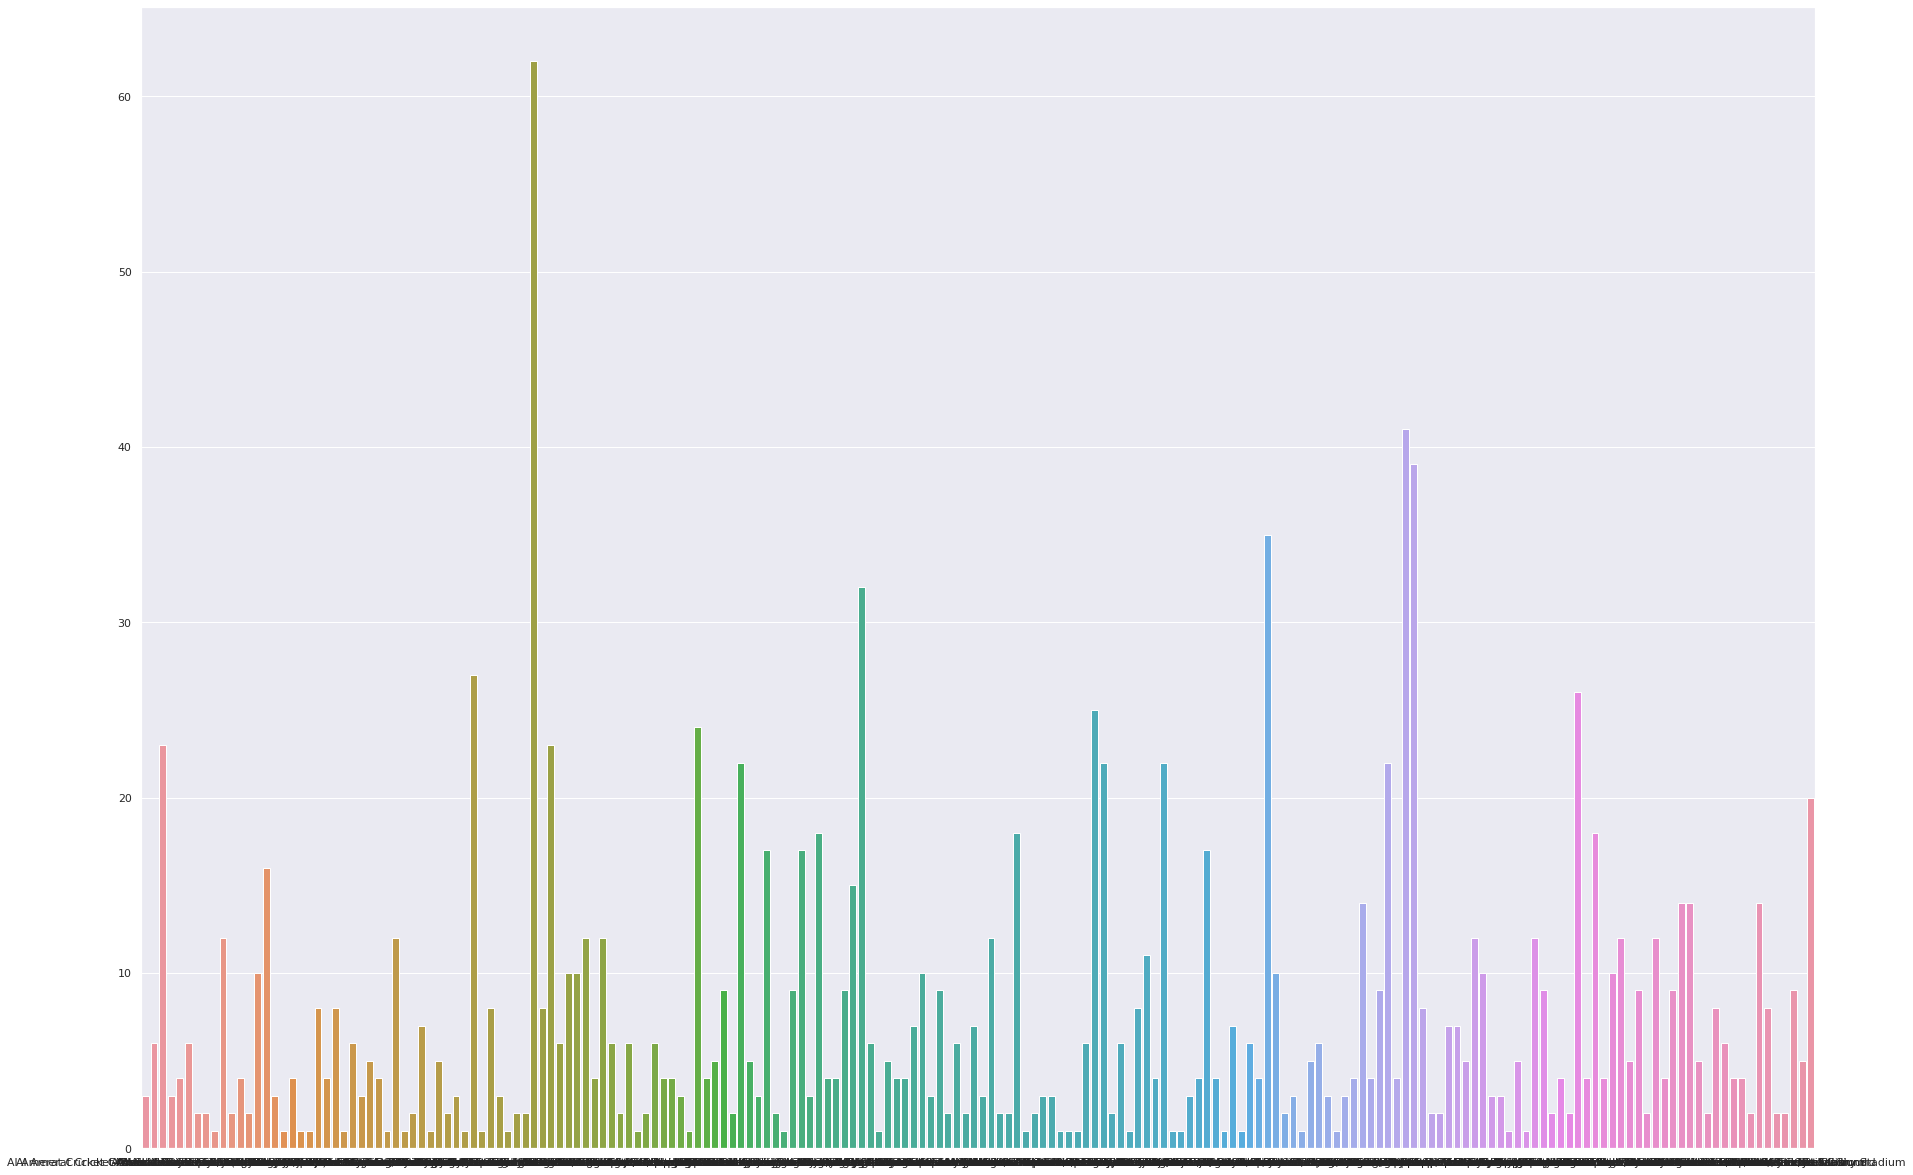

In [ ]:
x,y = np.unique(df['venue'],return_counts=True)
sns.barplot(x,y)

In [ ]:
venue_df = pd.DataFrame(df.groupby('venue')['venue'].count().sort_values(ascending=False)[:3])
print(f"The top 3 Venues where most number of matches are held are \n{venue_df['venue']}")

The top 3 Venues where most number of matches are held are 
venue
Dubai International Cricket Stadium    62
Sheikh Zayed Stadium                   41
Shere Bangla National Stadium          39
Name: venue, dtype: int64


# **Find out the pair of cricket teams who played the most number of T20 matches against each other.**

In [ ]:
df['team1']=df['teams'].apply(lambda x : literal_eval(x)[0] )
df['team2']=df['teams'].apply(lambda x : literal_eval(x)[1] )

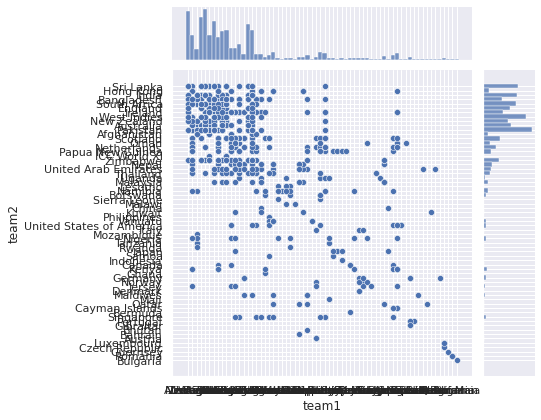

In [ ]:
sns.jointplot(x='team1', y='team2', data=df)

In [ ]:
def find_index(a,val):
  for i in range(len(a)):
    for j in range(len(a)):
      if a[i,j]==val:
        return i,j

In [ ]:
teams = sorted(list(set(df['team1'])|set(df['team2'])))

In [ ]:
match_matrix = np.zeros((len(teams),len(teams)),dtype= int)

In [ ]:
for i,row in df.iterrows():
  match_matrix[teams.index(row['team1'])][teams.index(row['team2'])]+=1
  match_matrix[teams.index(row['team2'])][teams.index(row['team1'])]+=1

In [ ]:
teams_index = find_index(match_matrix,match_matrix.max())

In [ ]:
print(f" Teams that played the most matches together are {teams[teams_index[0]]} and {teams[teams_index[-1]]} and they played a total of {match_matrix.max()} games")

 Teams that played the most matches together are Australia and England and they played a total of 45 games


# **Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.**

In [ ]:
winner_dict = {}
for i,row in df.iterrows():
  if winner_dict.get(row['team1'],False) and winner_dict.get(row['team2'],False):
    try:
      if row['outcome_winner']:
        winner_dict[row['outcome_winner']]['Wins'] += 1
    except:
      pass
    winner_dict[row['team1']]['Played']+=1
    winner_dict[row['team2']]['Played']+=1
  else:
    if not winner_dict.get(row['team1'],False):
      winner_dict[row['team1']] = {'Team':row['team1'],'Played':1,'Wins':0}
    if not winner_dict.get(row['team2'],False):
      winner_dict[row['team2']] = {'Team':row['team2'],'Played':1,'Wins':0}
    try:
      if row['outcome_winner']:
        winner_dict[row['outcome_winner']]['Wins'] = 1
    except:
      pass

In [ ]:
# "Team" : {'Name': ,"Played": ,'Wins': ,"Played"}

In [ ]:
wins_df = pd.DataFrame(winner_dict.values())

In [ ]:
wins_df.head()

,Team,Played,Wins
0,Australia,214,132
1,Sri Lanka,182,69
2,Ireland,126,44
3,Hong Kong,49,17
4,Zimbabwe,75,19


In [ ]:
wins_df['Win_Percentage'] = wins_df.apply(lambda x : round(x['Wins']/x["Played"]*100,2),axis=1)

In [ ]:
wins_df.head()

,Team,Played,Wins,Win_Percentage
0,Australia,214,132,61.68
1,Sri Lanka,182,69,37.91
2,Ireland,126,44,34.92
3,Hong Kong,49,17,34.69
4,Zimbabwe,75,19,25.33


In [ ]:
print("Top Five Teams with the highest Win Percentage")
wins_df.sort_values(by = ['Win_Percentage','Played'],ascending = [False,False])[:5]

Top Five Teams with the highest Win Percentage


,Team,Played,Wins,Win_Percentage
65,Belgium,2,2,100.00
57,Spain,6,5,83.33
38,Tanzania,3,2,66.67
40,Indonesia,3,2,66.67
70,Romania,3,2,66.67


# **Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.**

In [ ]:
# 1. Top 4 Scorers of first bat, Top 4 Bowlers opponent team
# 2. Top 4 Scorers of second bat, Top 4 Bowlers opponent team
'''
Player Runs balls_played Balls Bowled runs_given wicket
'''
'''
economy Strikerate Runs Per wicket
'''

'\neconomy Strikerate Runs Per wicket\n'

In [ ]:
# pd.DataFrame(eval(df.iloc[0,0])[0]['1st innings']['deliveries'])

In [ ]:
# eval(df.iloc[0,0])[1]['2nd innings']['deliveries'][:100]

In [ ]:
# type(keys[0])

In [ ]:
def find_deliveries(lod):
  keys = []
  for i in lod:
    keys += list(i.keys())
  return keys

In [ ]:
def generate_scorecard(lod):
  scorecard = {}
  delivery_list = find_deliveries(lod)
  for ball,dic in zip(delivery_list,lod):
    s = dic[ball] #inner dictionary containing {batsma,bowler,nonstriker,runs and wicket}
    if s['batsman'] in scorecard.keys():
      scorecard[s['batsman']]['Runs'] += s['runs']['batsman']
      scorecard[s['batsman']]['Balls_Played'] += 1
    else:
      scorecard[s['batsman']] = {'Player': s['batsman'], "Runs" : s['runs']['batsman'], 'Balls_Played':1, 'Balls_Bowled':0, "Runs_given":0, "wicket":0}
    
    #######

    if s['non_striker'] not in scorecard.keys():
      scorecard[s['non_striker']] = {'Player': s['non_striker'], "Runs" : 0, 'Balls_Played':0, 'Balls_Bowled':0, "Runs_given":0, "wicket":0}
    
    ########
    
    if s['bowler'] in scorecard.keys():
      wicket = 0
      if s.get('wicket'):
        wicket = 1
      scorecard[s['bowler']]['Runs_given'] += s['runs']['total']
      scorecard[s['bowler']]['Balls_Bowled'] += 1
      scorecard[s['bowler']]['wicket'] += wicket
    else:
      wicket = 0
      if s.get('wicket'):
        wicket = 1
      scorecard[s['bowler']] = {'Player': s['bowler'], "Runs" : 0, 'Balls_Played':0, 'Balls_Bowled':1, "Runs_given":s['runs']['total'], "wicket":wicket}
    ########
  return pd.DataFrame(scorecard.values())

In [ ]:
def find_sr_and_economy(df):
  df['Strike_Rate']=np.nan
  for i,row in df.iterrows():
    if row['Balls_Played'] != 0:
      df.loc[i,"Strike_Rate"] = round(row['Runs']/row['Balls_Played']*100)
  df['Economy']= np.nan
  for i,row in df.iterrows():
    if row['Balls_Bowled']!=0:
      df.loc[i,"Economy"] = round(row['Runs_given']/row['Balls_Bowled']*6,2)

  return df

In [ ]:
def find_top_scorers(innings):
  '''
  Input innings as string
  '''
  df1 = generate_scorecard(eval(innings)[0]['1st innings']['deliveries'])
  df2 = generate_scorecard(eval(innings)[1]['2nd innings']['deliveries'])
  df1 = find_sr_and_economy(df1)
  df2 = find_sr_and_economy(df2)
  temp1_sr = df1.sort_values(by = ["Runs","Strike_Rate"],ascending = [False,False])[:4]
  temp1_ec = df1.sort_values(by = "Economy")[:4]
  temp2_sr = df2.sort_values(by = ["Runs","Strike_Rate"],ascending = [False,False])[:4]
  temp2_ec = df2.sort_values(by = "Economy")[:4]
  df1 = temp1_sr.append(temp1_ec).reset_index().drop('index',axis=1)
  df2 = temp2_sr.append(temp2_ec).reset_index().drop('index',axis=1)
  return df1,df2

In [ ]:
df1,df2 = find_top_scorers(df.iloc[10,0])

In [ ]:
print("The top Players Scorecard 1st Inning")
df1

The top Players Scorecard 1st Inning


,Player,Runs,Balls_Played,Balls_Bowled,Runs_given,wicket,Strike_Rate,Economy
0,HM Amla,62,44,0,0,0,141.0,NaN
1,F du Plessis,36,26,0,0,0,138.0,NaN
2,JP Duminy,29,16,0,0,0,181.0,NaN
3,AB de Villiers,26,17,0,0,0,153.0,NaN
4,TA Boult,0,0,24,12,2,NaN,3.00
5,C de Grandhomme,0,0,19,22,2,NaN,6.95
6,MJ Santner,0,0,24,44,0,NaN,11.00
7,C Munro,0,0,6,11,0,NaN,11.00


In [ ]:
df2

,Player,Runs,Balls_Played,Balls_Bowled,Runs_given,wicket,Strike_Rate,Economy
0,TC Bruce,33,27,0,0,0,122.0,NaN
1,TG Southee,20,6,0,0,0,333.0,NaN
2,C de Grandhomme,15,8,0,0,0,188.0,NaN
3,KS Williamson,13,14,0,0,0,93.0,NaN
4,CH Morris,0,0,18,10,2,NaN,3.33
5,AL Phehlukwayo,0,0,19,19,3,NaN,6.00
6,Imran Tahir,0,0,23,24,5,NaN,6.26
7,D Paterson,0,0,12,14,0,NaN,7.00


In [ ]:
# This solution notebook has been contributed by Devashish Bose.